# Optical Fibers

### **1.1 What Is an Optical Fiber?**

An **optical fiber** is a flexible, transparent fiber made of glass (silica) or plastic that transmits light between the two ends. It is a **waveguide** for light, operating on the principle of **total internal reflection (TIR)**.


### **1.2 Structure of an Optical Fiber**

**Three main layers:**

| Layer    | Material     | Function                                     |
| -------- | ------------ | -------------------------------------------- |
| Core     | Glass/Silica | Light-carrying region                        |
| Cladding | Glass/Silica | Keeps the light confined in the core via TIR |
| Coating  | Polymer      | Mechanical protection                        |

The **core** has a higher refractive index than the **cladding**, ensuring TIR.

### **1.3 Principle of Total Internal Reflection**

* $n_1$: Refractive index of core
* $n_2$: Refractive index of cladding, where $n_2 < n_1$

**Total internal reflection** occurs when light is incident at the core-cladding boundary at an angle $\theta$ such that:

$$
\theta > \theta_c = \sin^{-1}\left( \frac{n_2}{n_1} \right)
$$

This ensures the light is trapped inside the core.

### **1.4 Acceptance Angle and Numerical Aperture (NA)**

The **Acceptance Angle** $\theta_0$ is the maximum angle at which light can enter the fiber and still be guided.

The **Numerical Aperture** (NA) defines this and is given by:

$$
\text{NA} = \sqrt{n_1^2 - n_2^2}
$$

$$
\sin(\theta_0) = \text{NA}
$$


### **1.5 Types of Optical Fibers**

| Type                    | Core Diameter | Mode Count      | Used For                      |
| ----------------------- | ------------- | --------------- | ----------------------------- |
| Single Mode Fiber (SMF) | \~8–10 µm     | One             | Long-distance, high-bandwidth |
| Multi-Mode Fiber (MMF)  | 50–62.5 µm    | Multiple (100s) | Short-distance, LAN           |

**SMF** has low dispersion and supports higher data rates over longer distances.
**MMF** is cheaper but suffers from **modal dispersion**.


### **1.6 Key Equations**

* **Critical angle**:

  $$
  \theta_c = \sin^{-1}\left(\frac{n_2}{n_1}\right)
  $$

* **Numerical Aperture**:

  $$
  \text{NA} = \sqrt{n_1^2 - n_2^2}
  $$

* **V-Number** (determines number of modes):

  $$
  V = \frac{2\pi a}{\lambda} \cdot \text{NA}
  $$

  where:

  * $a$: Core radius
  * $\lambda$: Wavelength of light

  For **Single Mode Operation**, $V < 2.405$





---

### NA, acceptance angle, and V-number


Here are the computed results for your optical fiber parameters:

* **Numerical Aperture (NA)**: 0.2425
* **Acceptance Angle**: 14.03°
* **V-number**: 4.42
* **Single Mode?**: **No** (because $V > 2.405$)

This means the fiber supports **multiple modes** at a wavelength of 1550 nm with a 4.5 µm radius. To achieve single-mode behavior, either the core radius should be smaller, or the wavelength should be longer.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
wavelength = 1550e-9  # 1550 nm in meters, common telecom wavelength

# Example fiber parameters
n_core = 1.48       # Refractive index of core
n_cladding = 1.46   # Refractive index of cladding
core_radius = 4.5e-6  # 4.5 microns, typical for SMF

# Numerical Aperture (NA)
NA = np.sqrt(n_core**2 - n_cladding**2)

# Acceptance Angle in radians and degrees
theta_0_rad = np.arcsin(NA)
theta_0_deg = np.degrees(theta_0_rad)

# V-number
V = (2 * np.pi * core_radius / wavelength) * NA

# Print results
results = {
    "Numerical Aperture (NA)": NA,
    "Acceptance Angle (degrees)": theta_0_deg,
    "V-number": V,
    "Single Mode?": "Yes" if V < 2.405 else "No"
}

results


{'Numerical Aperture (NA)': np.float64(0.2424871130596432),
 'Acceptance Angle (degrees)': np.float64(14.033378410321736),
 'V-number': np.float64(4.423330062455067),
 'Single Mode?': 'No'}

### Ray tracing for multimode vs single-mode visualization

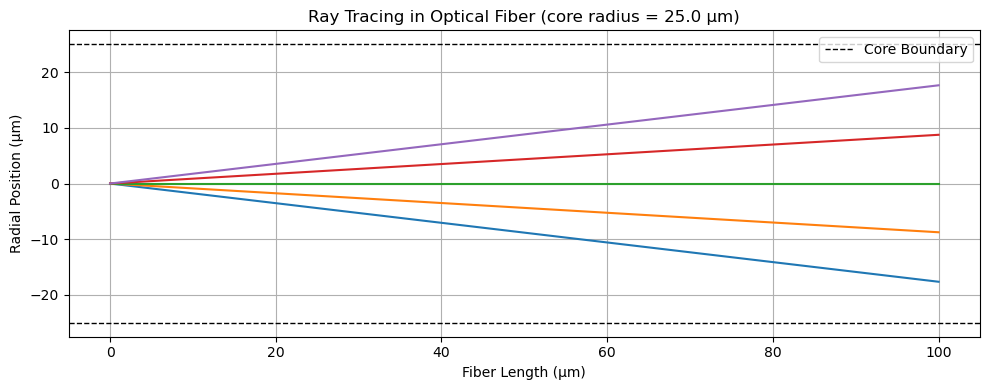

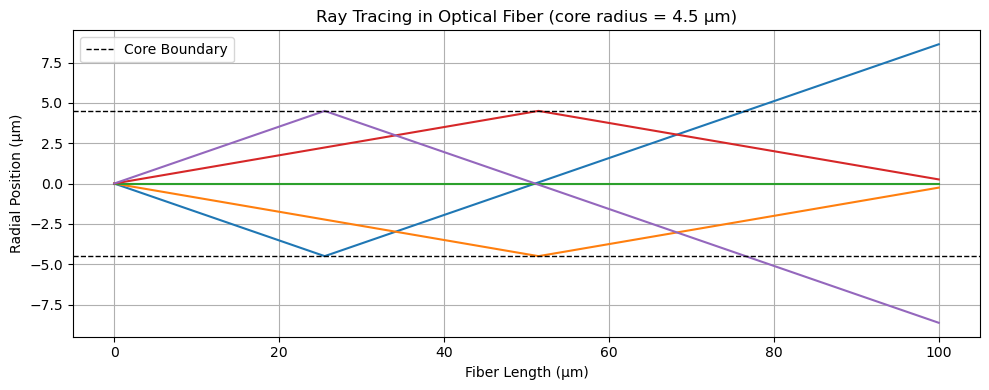

In [2]:

def ray_trace(core_radius, n_core, n_cladding, num_rays=5, angle_spread=10):
    """
    Simulates ray tracing inside an optical fiber.
    """
    fiber_length = 100e-6  # 100 microns
    z = np.linspace(0, fiber_length, 1000)
    
    # Central ray angle and spread (in degrees)
    base_angle = 0  # central axis
    angles = np.linspace(-angle_spread, angle_spread, num_rays)
    angles_rad = np.radians(angles)
    
    # Ray tracing plot
    plt.figure(figsize=(10, 4))
    
    for angle in angles_rad:
        x = np.tan(angle) * z
        # Reflect rays at the core-cladding boundary
        for i in range(len(x)):
            if abs(x[i]) >= core_radius:
                angle *= -1  # reflect
                x[i:] = np.tan(angle) * (z[i:] - z[i]) + x[i]
                break
        plt.plot(z * 1e6, x * 1e6)  # convert to microns for plotting

    plt.axhline(core_radius * 1e6, color='k', linestyle='--', linewidth=1, label='Core Boundary')
    plt.axhline(-core_radius * 1e6, color='k', linestyle='--', linewidth=1)
    plt.title(f"Ray Tracing in Optical Fiber (core radius = {core_radius*1e6:.1f} µm)")
    plt.xlabel("Fiber Length (µm)")
    plt.ylabel("Radial Position (µm)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example: Multimode fiber (core radius = 25 µm)
ray_trace(core_radius=25e-6, n_core=1.48, n_cladding=1.46)

# Example: Single-mode-like (core radius = 4.5 µm)
ray_trace(core_radius=4.5e-6, n_core=1.48, n_cladding=1.46)


The two plots above show **ray tracing simulations** for:

1. **Multimode Fiber (25 µm core radius)**:

   * Multiple rays enter at different angles and reflect within the core.
   * These reflections represent **multiple guided modes**.
   * Greater core radius and acceptance angle support many paths.

2. **Single-Mode-like Fiber (4.5 µm core radius)**:

   * Only very shallow-angle rays are guided.
   * Most rays would either not enter or leak out (not shown here).
   * The visualization suggests fewer or no reflections, aligning with **single-mode behavior**.

This ray model gives an intuitive view of how light behaves in multimode vs. single-mode fibers.




---

## **Dispersion and Attenuation in Optical Fibers**

**Dispersion** causes **pulse broadening** during transmission. As a result, optical pulses spread out and may overlap, leading to **inter-symbol interference (ISI)** and **bit errors**.

There are **two main types**:

| Type                 | Occurs In          | Caused By                                        |
| -------------------- | ------------------ | ------------------------------------------------ |
| Modal Dispersion     | Multimode fibers   | Different modes take different paths             |
| Chromatic Dispersion | Single-mode fibers | Different wavelengths travel at different speeds |


### **Modal Dispersion**

* **Only in Multimode fibers**.
* Rays enter at different angles (modes), traveling different distances.
* Higher-order modes take longer paths → arrive later.
* Results in **pulse spreading**.

**Modal Delay Spread** $\Delta t \approx \frac{n_1 L \Delta}{c}$

Where:

* $L$: fiber length
* $n_1$: core refractive index
* $\Delta = \frac{n_1 - n_2}{n_1}$: relative index difference
* $c$: speed of light

### **Chromatic Dispersion (Group Velocity Dispersion)**

Occurs because the **refractive index $n(\lambda)$** varies with wavelength.

Two parts:

1. **Material Dispersion**: caused by $n(\lambda)$ of silica
2. **Waveguide Dispersion**: caused by fiber geometry

Total **Dispersion Parameter**:

$$
D(\lambda) = \frac{d}{d\lambda} \left( \frac{1}{v_g} \right) 
= -\frac{\lambda}{c} \cdot \frac{d^2 n}{d\lambda^2} 
\quad \left[ \frac{\text{ps}}{\text{nm} \cdot \text{km}} \right]
$$


* $v_g$: group velocity
* Affects **single-mode fibers** at high bitrates (e.g., 10 Gbps+)
* Can be **positive or negative**, depending on wavelength

### **Dispersion Length**

A way to estimate how far a pulse can travel before significant spreading:

$$
L_D = \frac{T_0^2}{|\beta_2|}
$$

* $T_0$: input pulse width
* $\beta_2$: group velocity dispersion parameter


### **Attenuation**

**Attenuation** refers to signal power loss along the fiber, typically measured in **dB/km**.

The **Power at distance $z$** is:

$$
P(z) = P_0 e^{-\alpha z}
$$

or in decibels:

$$
\text{Loss (dB)} = 10 \log_{10} \left( \frac{P_0}{P(z)} \right) = \alpha_{dB} \cdot z
$$

Where:

* $\alpha$: attenuation coefficient (in $\text{km}^{-1}$)
* Typical $\alpha_{dB}$ at 1550 nm ≈ **0.2 dB/km** for modern SMF

**Sources of attenuation:**

* **Absorption** (by impurities like OH- ions)
* **Scattering** (Rayleigh scattering)
* **Bending losses**

---

| Concept              | Dominant In        | Effect                            |
| -------------------- | ------------------ | --------------------------------- |
| Modal Dispersion     | Multimode fibers   | Intermodal delay, pulse spreading |
| Chromatic Dispersion | Single-mode fibers | Wavelength-dependent delay        |
| Attenuation          | All fibers         | Signal loss, power degradation    |




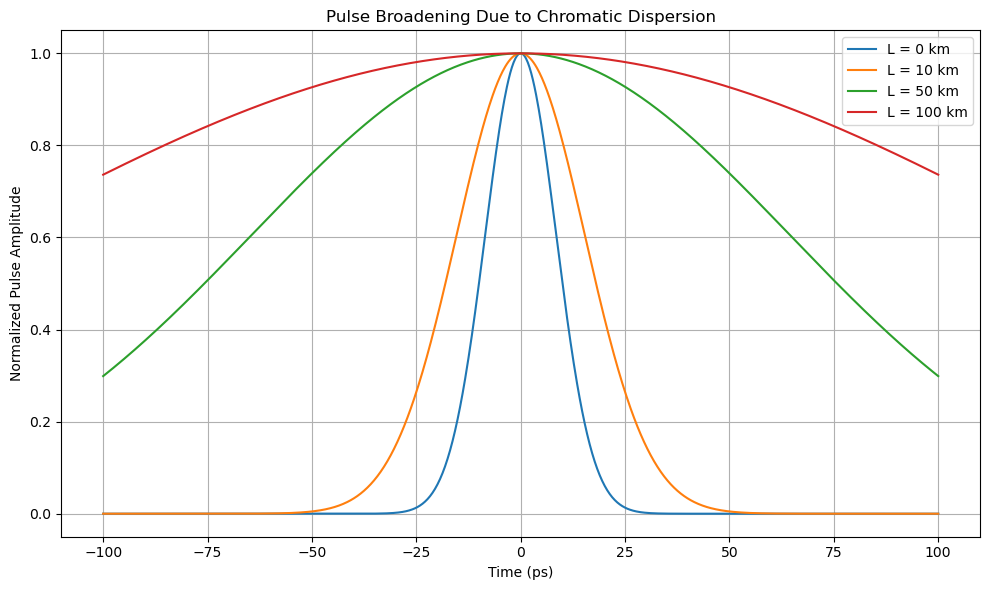

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
T0 = 20e-12  # initial pulse width (20 ps)
D = 17e-6    # dispersion parameter D in s/m^2 (converted from 17 ps/(nm·km))
lambda0 = 1550e-9  # central wavelength in meters
c = 3e8  # speed of light in m/s
beta2 = - (lambda0**2 * D) / (2 * np.pi * c)  # beta2 in s^2/m

# Fiber parameters
L_values = [0, 10e3, 50e3, 100e3]  # fiber lengths in meters (0 km, 10 km, 50 km, 100 km)

# Time axis
t = np.linspace(-100e-12, 100e-12, 1000)

plt.figure(figsize=(10, 6))

for L in L_values:
    # Calculate output pulse width after traveling distance L
    T_L = T0 * np.sqrt(1 + (4 * np.log(2) * beta2 * L / T0**2)**2)
    
    # Generate Gaussian pulse with updated width
    pulse = np.exp(-4 * np.log(2) * (t / T_L)**2)
    plt.plot(t * 1e12, pulse, label=f"L = {L/1000:.0f} km")

plt.title("Pulse Broadening Due to Chromatic Dispersion")
plt.xlabel("Time (ps)")
plt.ylabel("Normalized Pulse Amplitude")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Attenuation over a given fiber length

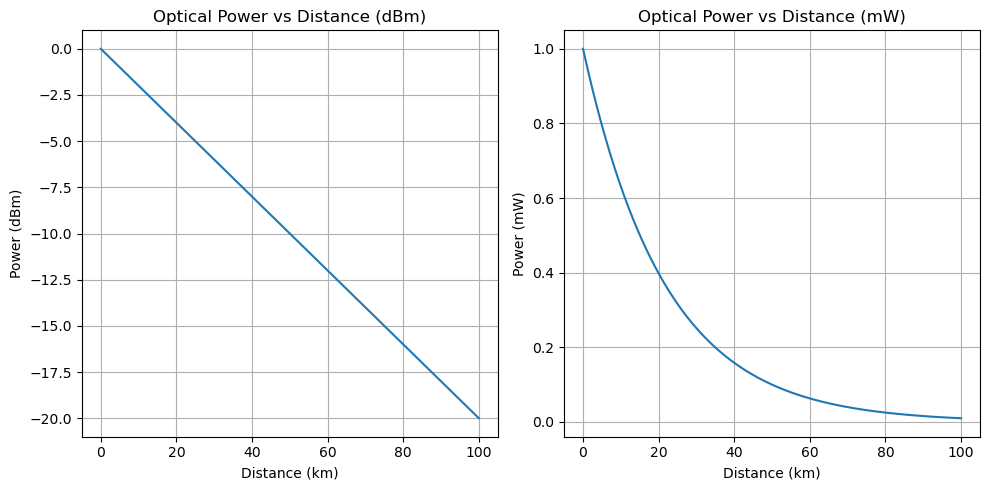

In [5]:
P0_dBm = 0  # Input power in dBm (1 mW)
alpha_dB_per_km = 0.2  # Attenuation coefficient in dB/km (typical for 1550 nm)

# Fiber lengths
L_km = np.linspace(0, 100, 500)  # 0 to 100 km
P_dBm = P0_dBm - alpha_dB_per_km * L_km  # Power in dBm over distance

# Convert dBm to mW
P_mW = 10 ** (P_dBm / 10)

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(L_km, P_dBm)
plt.title("Optical Power vs Distance (dBm)")
plt.xlabel("Distance (km)")
plt.ylabel("Power (dBm)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(L_km, P_mW)
plt.title("Optical Power vs Distance (mW)")
plt.xlabel("Distance (km)")
plt.ylabel("Power (mW)")
plt.grid(True)

plt.tight_layout()
plt.show()



### Modal dispersion using time-of-arrival in multimode fibers

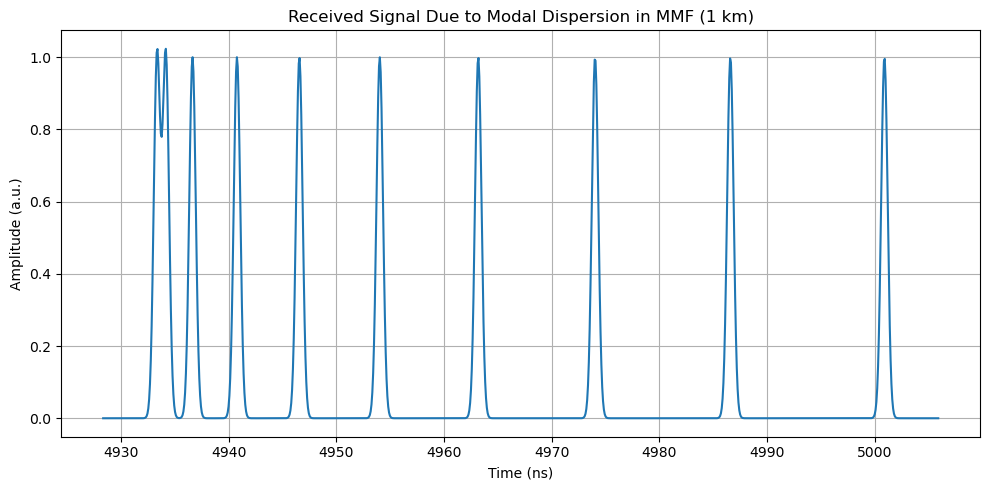

In [6]:
n_core = 1.48
n_cladding = 1.46
delta = (n_core - n_cladding) / n_core  # Relative index difference
L = 1e3  # Fiber length in meters (1 km)
c = 3e8  # Speed of light in vacuum (m/s)

# Number of modes to simulate (each with different angle)
num_modes = 10
angles = np.linspace(0, np.arcsin(np.sqrt(1 - (n_cladding / n_core) ** 2)), num_modes)

# Calculate effective group velocity for each mode
v_eff = c / n_core * np.cos(angles)  # approximation for delay based on path length

# Time of arrival for each mode
t_arrival = L / v_eff * 1e9  # convert to nanoseconds

# Simulate pulses arriving at different times
t = np.linspace(np.min(t_arrival) - 5, np.max(t_arrival) + 5, 1000)
received_signal = np.zeros_like(t)

for t0 in t_arrival:
    received_signal += np.exp(-((t - t0) ** 2) / (2 * (0.3)**2))  # 0.3 ns wide pulse

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(t, received_signal)
plt.title("Received Signal Due to Modal Dispersion in MMF (1 km)")
plt.xlabel("Time (ns)")
plt.ylabel("Amplitude (a.u.)")
plt.grid(True)
plt.tight_layout()
plt.show()


## **Nonlinear Effects in Optical Fibers**

When light intensity is high (e.g., long-haul systems with amplifiers), the fiber's refractive index becomes **intensity-dependent**, leading to **nonlinear impairments**.


### **Nonlinear Refractive Index**

The refractive index becomes:

$$
n = n_0 + n_2 I
$$

Where:

* $n_0$: linear refractive index
* $n_2$: nonlinear index coefficient (\~ $2.6 \times 10^{-20} \, \text{m}^2/\text{W} $ for silica)
* $I$: optical intensity


### **Nonlinear Effects**

| Effect                                    | Caused By                                 | Impacts                           |
| ----------------------------------------- | ----------------------------------------- | --------------------------------- |
| **SPM** (Self-Phase Modulation)           | Intensity changes phase of the same pulse | Spectral broadening               |
| **XPM** (Cross-Phase Modulation)          | One wavelength affects phase of another   | Inter-channel interference in WDM |
| **FWM** (Four-Wave Mixing)                | Interaction of 3 waves creates 4th        | Generates crosstalk in WDM        |
| **Stimulated Raman Scattering (SRS)**     | Photon transfer from short to long λ      | Depletes signal                   |
| **Stimulated Brillouin Scattering (SBS)** | Scattering by acoustic phonons            | Limits power                      |


### **SPM Equation Example**

The **nonlinear Schrödinger equation** governs pulse propagation:

$$
\frac{\partial A}{\partial z} + \frac{\alpha}{2} A + i\frac{\beta_2}{2} \frac{\partial^2 A}{\partial t^2} = i \gamma |A|^2 A
$$

Where:

* $A(z,t)$: pulse envelope
* $\beta_2$: dispersion
* $\gamma = \frac{2\pi n_2}{\lambda A_{\text{eff}}}$: nonlinearity coefficient
* $\alpha$: attenuation


### **Shannon Capacity of Optical Fiber Channels**

Optical fiber behaves like a **band-limited AWGN channel** at low powers, but nonlinearities limit capacity at high powers.

### **Linear (Shannon) Capacity**

$$
C = B \cdot \log_2\left(1 + \frac{P}{N}\right) \quad \text{[bits/s]}
$$

Where:

* $B$: bandwidth
* $P$: signal power
* $N$: noise power (mainly ASE from optical amplifiers)


### **Nonlinear Shannon-like Capacity Limit**

Due to nonlinearities, increasing $P$ beyond a point increases **interference**, reducing capacity. There's a peak capacity at some **optimal launch power** $P^*$.

> In WDM systems, the **nonlinear interference noise (NLI)** grows with power and number of channels:

$$
C_{\text{nonlinear}} \approx B \log_2 \left(1 + \frac{P}{N + \eta P^3} \right)
$$

* $\eta$: nonlinear interference coefficient
* $P^3$: indicates how NLI scales with power



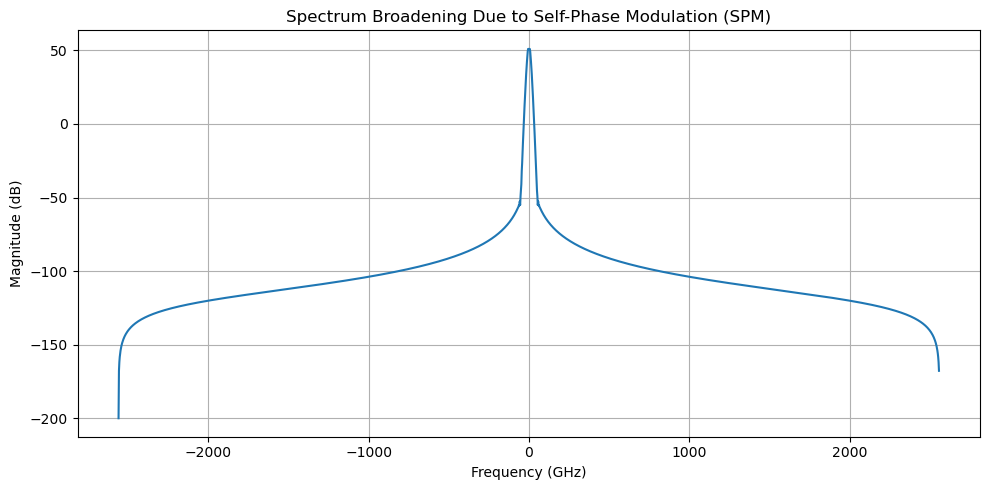

In [7]:
T0 = 50e-12           # Initial pulse width (50 ps)
A0 = 1.0              # Initial peak amplitude
gamma = 3.0           # Nonlinearity coefficient [1/W·km]
L = 1.0               # Fiber length [km]
z_steps = 100         # Number of steps along the fiber
dz = L / z_steps      # Step size

# Time and frequency axes
t = np.linspace(-200e-12, 200e-12, 2048)  # 400 ps window
dt = t[1] - t[0]
f = np.fft.fftfreq(len(t), d=dt)
f_shifted = np.fft.fftshift(f)

# Initial Gaussian pulse (complex for nonlinear phase modulation)
A = A0 * np.exp(-t**2 / (2 * T0**2)).astype(np.complex128)

# Simulate SPM only (no dispersion)
for _ in range(z_steps):
    phase_shift = np.exp(1j * gamma * np.abs(A)**2 * dz)
    A *= phase_shift  # Apply nonlinear phase shift

# Fourier Transform to get spectrum
spectrum = np.fft.fft(A)
spectrum_dB = 20 * np.log10(np.abs(np.fft.fftshift(spectrum)) + 1e-10)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(f_shifted * 1e-9, spectrum_dB)
plt.title("Spectrum Broadening Due to Self-Phase Modulation (SPM)")
plt.xlabel("Frequency (GHz)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.tight_layout()
plt.show()


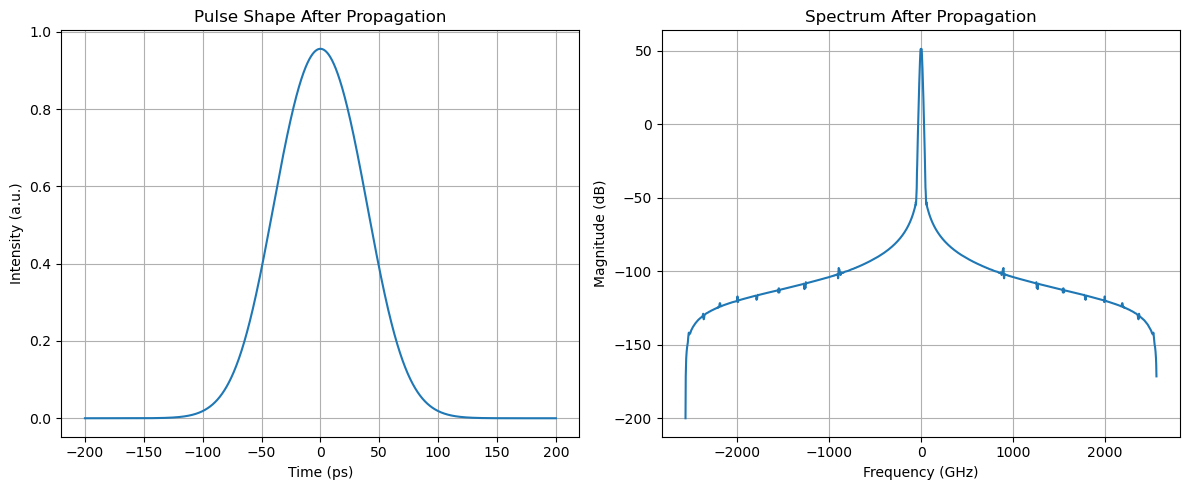

In [8]:
T0 = 50e-12              # Initial pulse width (50 ps)
A0 = 1.0                 # Pulse amplitude
beta2 = -20e-27          # GVD parameter [s^2/m] (~ -20 ps^2/km)
gamma = 3.0              # Nonlinear coefficient [1/W·km]
L = 1.0                  # Fiber length [km]
z_steps = 200            # Number of steps along fiber
dz = L / z_steps         # Step size in km
dz_m = dz * 1e3          # Convert to meters for beta2

# Time and frequency axis
t = np.linspace(-200e-12, 200e-12, 2048)
dt = t[1] - t[0]
f = np.fft.fftfreq(len(t), dt)
omega = 2 * np.pi * f

# Initial pulse (complex)
A = A0 * np.exp(-t**2 / (2 * T0**2)).astype(np.complex128)

# Propagate using Split-Step Fourier Method
for _ in range(z_steps):
    # Step 1: Half-step dispersion in frequency domain
    A_freq = np.fft.fft(A)
    A_freq *= np.exp(-1j * beta2 * omega**2 * dz_m / 2)
    A = np.fft.ifft(A_freq)

    # Step 2: Full-step nonlinear phase shift
    A *= np.exp(1j * gamma * np.abs(A)**2 * dz)

    # Step 3: Another half-step dispersion
    A_freq = np.fft.fft(A)
    A_freq *= np.exp(-1j * beta2 * omega**2 * dz_m / 2)
    A = np.fft.ifft(A_freq)

# Time-domain result
A_out = A
intensity = np.abs(A_out)**2

# Frequency-domain spectrum
spectrum = np.fft.fft(A_out)
spectrum_dB = 20 * np.log10(np.abs(np.fft.fftshift(spectrum)) + 1e-10)
f_shifted = np.fft.fftshift(f)

# Plot time and frequency domain
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(t * 1e12, intensity)
plt.title("Pulse Shape After Propagation")
plt.xlabel("Time (ps)")
plt.ylabel("Intensity (a.u.)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(f_shifted * 1e-9, spectrum_dB)
plt.title("Spectrum After Propagation")
plt.xlabel("Frequency (GHz)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)

plt.tight_layout()
plt.show()


## Wavelength Division Multiplexing (WDM) Systems

WDM allows multiple channels to be transmitted simultaneously over a single fiber using **different wavelengths**.

* **DWDM (Dense WDM)**: Channels spaced closely (e.g., 50 GHz or 100 GHz apart)
* **CWDM (Coarse WDM)**: Channels more widely spaced (e.g., 20 nm apart)

Each wavelength acts like a separate channel:

$$
\text{Total capacity} = N_{\text{channels}} \cdot R_{\text{channel}}
$$


### **Nonlinear Effects in WDM**

At high power or with many channels, **inter-channel nonlinearities** become dominant:

| Nonlinear Effect | Caused By                             | Impact                     |
| ---------------- | ------------------------------------- | -------------------------- |
| **XPM**          | One channel modulates phase of others | Crosstalk, timing errors   |
| **FWM**          | New frequencies generated via mixing  | Adds ghost signals in-band |

FWM is especially harmful if:

* Channels are **equally spaced**
* Dispersion is **low**


### **Capacity of Nonlinear WDM Systems**

In ideal linear fiber:

$$
C = B \log_2\left(1 + \frac{P}{N}\right)
$$

But with **nonlinear interference noise (NLI)**, capacity becomes:

$$
C = B \log_2\left(1 + \frac{P}{N + \eta P^3} \right)
$$

* $\eta$: Nonlinear coefficient, depends on fiber type, dispersion, WDM layout
* $P$: Power per channel
* **$\eta P^3$** is the dominant nonlinear noise term

### **Optimal Launch Power**

There exists a **power $P^*$** that maximizes $C$:

Too low → ASE noise dominates
Too high → NLI dominates



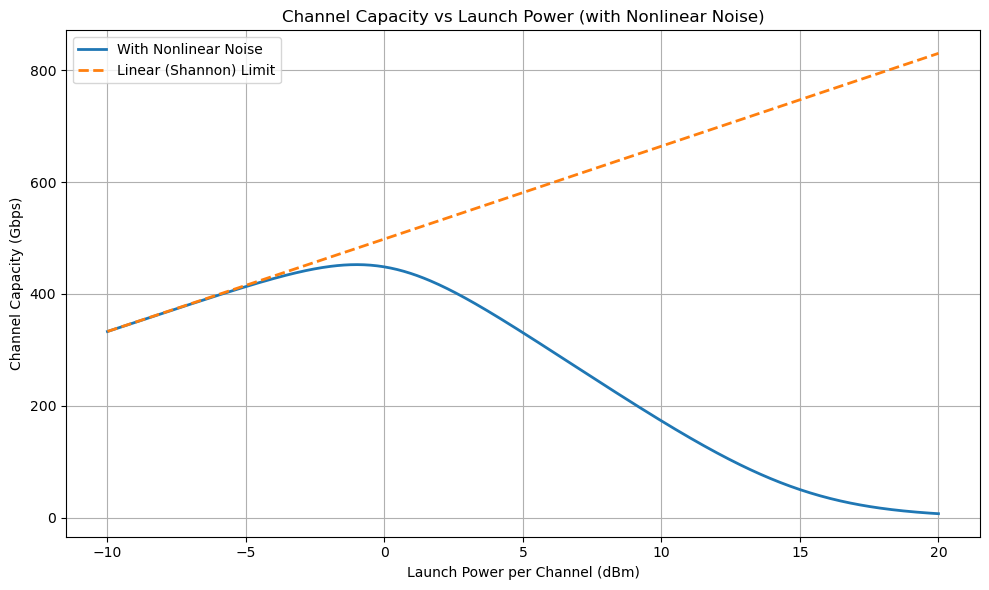

In [9]:
B = 50e9  # Channel bandwidth: 50 GHz
N = 1e-6  # Linear noise power (e.g., ASE) in watts
eta = 1e3  # Nonlinear interference coefficient in (1/W^2)

# Power range in dBm and watts
P_dBm = np.linspace(-10, 20, 500)
P_W = 10 ** (P_dBm / 10) / 1000  # Convert dBm to watts

# Capacity with nonlinear noise
C_nonlinear = B * np.log2(1 + P_W / (N + eta * P_W**3)) / 1e9  # in Gbps

# Capacity with only linear noise (Shannon capacity)
C_linear = B * np.log2(1 + P_W / N) / 1e9  # in Gbps

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(P_dBm, C_nonlinear, label="With Nonlinear Noise", linewidth=2)
plt.plot(P_dBm, C_linear, '--', label="Linear (Shannon) Limit", linewidth=2)
plt.title("Channel Capacity vs Launch Power (with Nonlinear Noise)")
plt.xlabel("Launch Power per Channel (dBm)")
plt.ylabel("Channel Capacity (Gbps)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


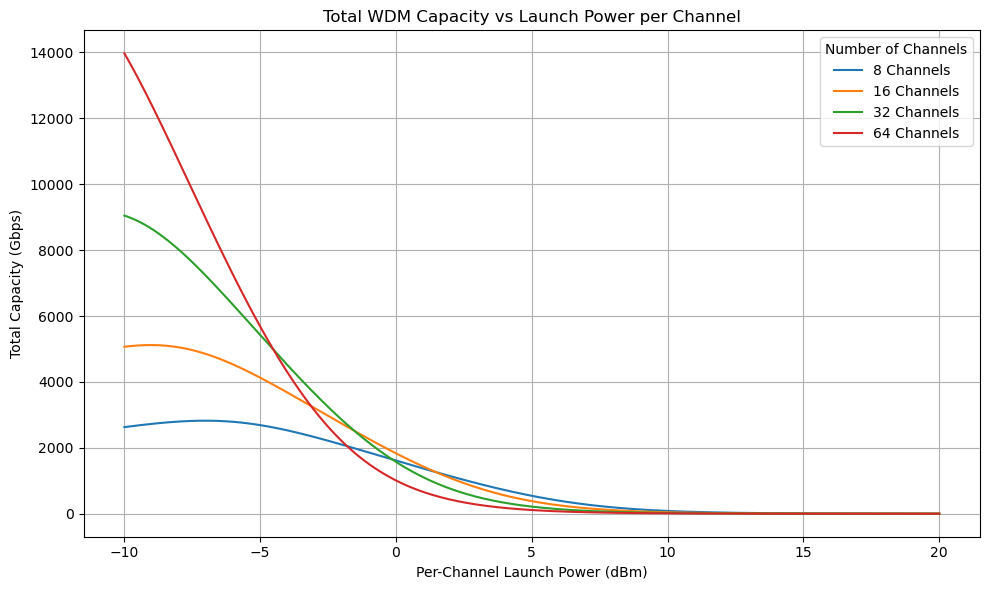

In [10]:
B_channel = 50e9  # Channel bandwidth: 50 GHz
N = 1e-6          # Linear noise power (ASE) in watts
eta = 1e3         # Nonlinear coefficient (1/W^2)
num_channels_list = [8, 16, 32, 64]  # Vary number of WDM channels

# Power range per channel (dBm and watts)
P_dBm = np.linspace(-10, 20, 500)
P_W = 10 ** (P_dBm / 10) / 1000  # Convert dBm to watts

# Plot total WDM capacity
plt.figure(figsize=(10, 6))

for N_ch in num_channels_list:
    # Total nonlinear noise increases with number of channels
    # Assuming NLI ~ eta * P^3 * (N_ch)^2 (simplified model)
    NLI = eta * (P_W**3) * (N_ch**2)
    C_total = N_ch * B_channel * np.log2(1 + P_W / (N + NLI)) / 1e9  # in Gbps
    plt.plot(P_dBm, C_total, label=f"{N_ch} Channels")

plt.title("Total WDM Capacity vs Launch Power per Channel")
plt.xlabel("Per-Channel Launch Power (dBm)")
plt.ylabel("Total Capacity (Gbps)")
plt.grid(True)
plt.legend(title="Number of Channels")
plt.tight_layout()
plt.show()


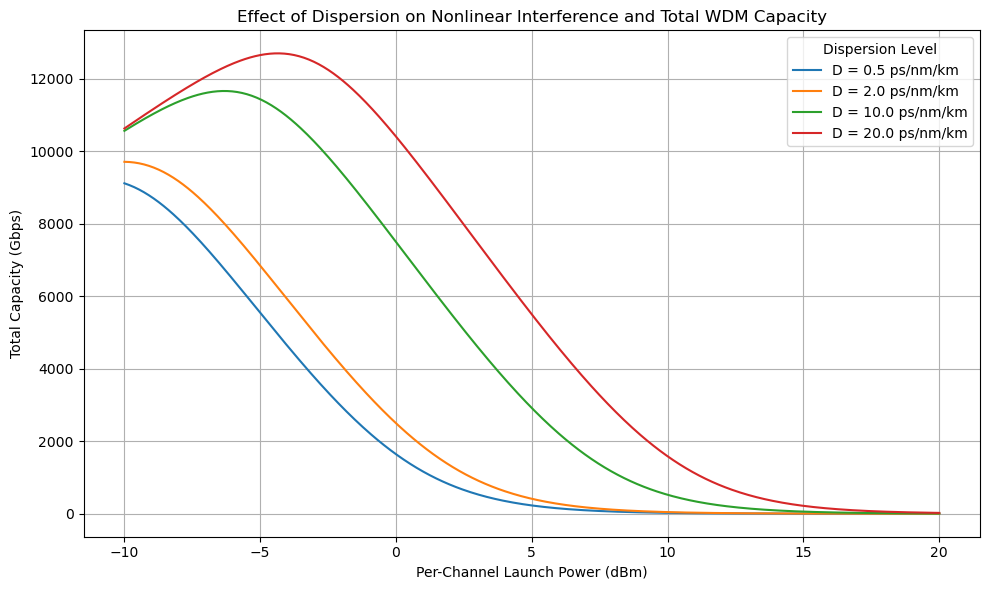

In [11]:
B_channel = 50e9  # Channel bandwidth: 50 GHz
N = 1e-6          # Linear ASE noise power (W)
P_dBm = np.linspace(-10, 20, 500)
P_W = 10 ** (P_dBm / 10) / 1000  # Power in W
N_ch = 32  # Number of WDM channels

# Dispersion levels in ps/nm/km (converted to effective suppression factor)
dispersion_levels = [0.5, 2.0, 10.0, 20.0]  # Typical range in SMF and DCF

# Simplified dispersion suppression model: higher dispersion reduces FWM
def suppression_factor(D):
    return 1 / (1 + (D / 2.0)**2)  # Arbitrary model: stronger D suppresses more

# Plotting capacity under different dispersion levels
plt.figure(figsize=(10, 6))

for D in dispersion_levels:
    eta_base = 1e3
    eta_eff = eta_base * suppression_factor(D)  # Dispersion reduces NLI
    NLI = eta_eff * P_W**3 * (N_ch**2)
    C_total = N_ch * B_channel * np.log2(1 + P_W / (N + NLI)) / 1e9  # in Gbps
    plt.plot(P_dBm, C_total, label=f"D = {D} ps/nm/km")

plt.title("Effect of Dispersion on Nonlinear Interference and Total WDM Capacity")
plt.xlabel("Per-Channel Launch Power (dBm)")
plt.ylabel("Total Capacity (Gbps)")
plt.grid(True)
plt.legend(title="Dispersion Level")
plt.tight_layout()
plt.show()


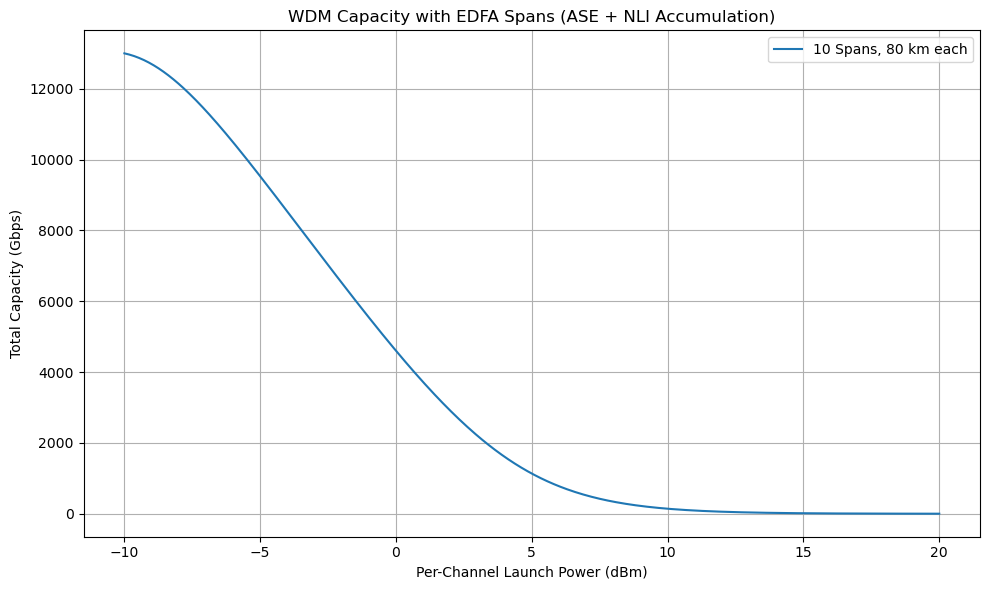

In [12]:
B_channel = 50e9     # Channel bandwidth: 50 GHz
N_ch = 32            # Number of WDM channels
P_dBm = np.linspace(-10, 20, 500)
P_W = 10 ** (P_dBm / 10) / 1000  # Power in W

# System configuration
span_length_km = 80     # EDFA span length in km
num_spans = 10          # Number of spans (800 km total)
NF = 5.0                # Noise figure of EDFA in dB
h = 6.626e-34           # Planck constant
nu = 193.1e12           # Optical carrier frequency (~1550 nm)
NF_linear = 10**(NF / 10)
T_0 = 290               # Room temperature in Kelvin

# ASE noise per span per channel
ASE_per_span = NF_linear * h * nu * B_channel

# Dispersion level (controls NLI suppression)
D = 16  # ps/nm/km (typical SMF)
eta_base = 1e3
suppression = 1 / (1 + (D / 2.0)**2)
eta_eff = eta_base * suppression

# NLI and ASE accumulation over spans
ASE_total = num_spans * ASE_per_span  # Accumulates linearly
NLI_total = lambda P: eta_eff * (P**3) * (N_ch**2) * num_spans  # Simplified model

# Capacity computation with ASE + NLI
C_total = []
for P in P_W:
    total_noise = ASE_total + NLI_total(P)
    capacity = N_ch * B_channel * np.log2(1 + P / total_noise) / 1e9  # in Gbps
    C_total.append(capacity)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(P_dBm, C_total, label=f"{num_spans} Spans, {span_length_km} km each")
plt.title("WDM Capacity with EDFA Spans (ASE + NLI Accumulation)")
plt.xlabel("Per-Channel Launch Power (dBm)")
plt.ylabel("Total Capacity (Gbps)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



## **Optical System Design: BER and Q-factor**

### **Bit Error Rate (BER)**

* **BER** is the probability that a received bit is incorrect.
* For a system with **Gaussian noise**, the BER for On-Off Keying (OOK) or QPSK is:

#### **Binary OOK with IM/DD:**

$$
\text{BER} = Q\left( \frac{I_1 - I_0}{\sigma_1 + \sigma_0} \right)
$$

Where:

* $I_1, I_0$: mean photocurrent for logical 1 and 0
* $\sigma_1, \sigma_0$: noise standard deviations
* $Q(x)$: tail probability of standard Gaussian

$$
Q(x) = \frac{1}{2} \text{erfc}\left( \frac{x}{\sqrt{2}} \right)
$$


### **Q-factor**

* The **Q-factor** measures the separation between logic levels in the presence of noise:

$$
Q = \frac{I_1 - I_0}{\sigma_1 + \sigma_0}
\Rightarrow \text{BER} = Q(Q)
$$

Higher Q → Lower BER.

### **Q-factor vs SNR**

For Gaussian noise:

$$
Q = \sqrt{2 \cdot \text{SNR}_{\text{lin}}}
\quad \text{and} \quad \text{BER} = Q(\sqrt{2 \cdot \text{SNR}})
$$

Or equivalently:

$$
\text{SNR}_{\text{dB}} = 10 \log_{10}\left(\frac{Q^2}{2}\right)
$$

### **BER Curves for IM/DD and Coherent Systems**

| Modulation  | BER vs SNR formula (AWGN)                                                       |
| ----------- | ------------------------------------------------------------------------------- |
| OOK (IM/DD) | $\text{BER} = Q(\sqrt{2 \cdot \text{SNR}})$                                     |
| BPSK        | Same as OOK                                                                     |
| QPSK        | $\text{BER} = Q(\sqrt{\text{SNR}})$                                             |
| 16-QAM      | $\text{BER} \approx \frac{3}{8} \cdot \text{erfc}(\sqrt{0.1 \cdot \text{SNR}})$ |




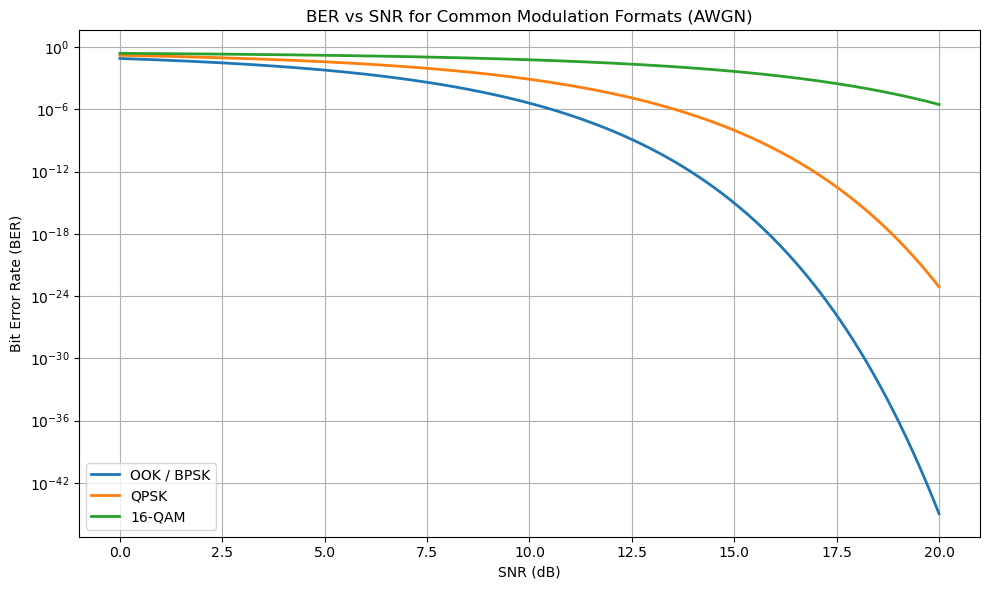

In [13]:
from scipy.special import erfc

# Define SNR range (linear and dB)
SNR_dB = np.linspace(0, 20, 500)
SNR_lin = 10 ** (SNR_dB / 10)

# BER formulas
BER_OOK = 0.5 * erfc(np.sqrt(SNR_lin))  # same as BPSK
BER_QPSK = 0.5 * erfc(np.sqrt(SNR_lin / 2))
BER_16QAM = (3/8) * erfc(np.sqrt(SNR_lin / 10))

# Plotting
plt.figure(figsize=(10, 6))
plt.semilogy(SNR_dB, BER_OOK, label='OOK / BPSK', linewidth=2)
plt.semilogy(SNR_dB, BER_QPSK, label='QPSK', linewidth=2)
plt.semilogy(SNR_dB, BER_16QAM, label='16-QAM', linewidth=2)

plt.title("BER vs SNR for Common Modulation Formats (AWGN)")
plt.xlabel("SNR (dB)")
plt.ylabel("Bit Error Rate (BER)")
plt.grid(True, which='both')
plt.legend()
plt.tight_layout()
plt.show()


## **Digital Coherent Receiver: Overview**

In a modern coherent optical system (e.g., QPSK or QAM), the receiver performs:

### **Analog Front-End**

* **Coherent detection** using 90° optical hybrid + LO laser
* Outputs: $I(t), Q(t)$ for both polarizations (X and Y)
* ADCs digitize these signals

### **DSP Blocks in the Digital Domain**

1. **Resampling**

   * Match sampling rate to symbol rate

2. **Chromatic Dispersion (CD) Compensation**

   * Frequency-domain filter to invert CD effects

3. **Polarization Demultiplexing**

   * 2x2 adaptive MIMO equalizer (e.g., CMA or LMS)

4. **Carrier Frequency Offset Estimation**

   * Estimate residual laser frequency offset

5. **Carrier Phase Recovery**

   * Track slow phase noise using blind phase search (BPS) or Viterbi-Viterbi

6. **Symbol Decision**

   * Map corrected constellation to bits → BER evaluation



* Generate random bits
* Modulate them using QPSK
* Apply CD and frequency offset
* Compensate using basic DSP
* Plot constellations before/after compensation



# Next steps


Move to WDM systems or nonlinear capacity limits

**Compare fiber capacity under different power levels** using a nonlinear noise model.

**Derive and simulate nonlinear Schrödinger equation (NLSE)** (advanced).

**Move to WDM system design and dispersion compensation**.

- coherent detection 
